# Практическое задание

## Задача 1

- cформировать с помощью `sklearn.make_classification` датасет
из 1000 объектов с двумя признаками;

- обучить случайный лес из 1, 3, 10 и 50, 100, 200 деревьев;

- визуализировать их разделяющие гиперплоскости на графиках;
(по подобию визуализации деревьев из предыдущего урока,
необходимо только заменить вызов функции `predict` на `tree_vote`).

- cделать выводы о получаемой сложности гиперплоскости и
недообучении или переобучении случайного леса в зависимости от количества деревьев в нем.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

from example_1 import random_forest, tree_vote
from problem_1 import error_matrix, error_metrics

### Set parameters

In [2]:
dataset_params = {
    'n_samples': 1000,
    'n_features': 2,
    'n_informative': 2,
    'n_redundant': 0,
    'n_repeated': 0,
    'n_classes': 2,
    'n_clusters_per_class': 2,
    'random_state': 1
}

split_params = {
    'test_size': 0.25,
    'random_state': 1
}

tree_nums = (1, 3, 10, 50, 100, 200)

metric_labels = {
    0: 'accuracy',
    1: 'precision',
    2: 'recall',
    3: 'f-score'
}

dataset_labels = {
    0: 'train',
    1: 'test'
}

colormap_params = {
    'base': ('red', 'blue'),
    'light': ('lightcoral', 'lightblue')
}

colormaps = {
    key: ListedColormap(value)
    for key, value in colormap_params.items()
}

### Make dataset

In [3]:
X, y = make_classification(**dataset_params)

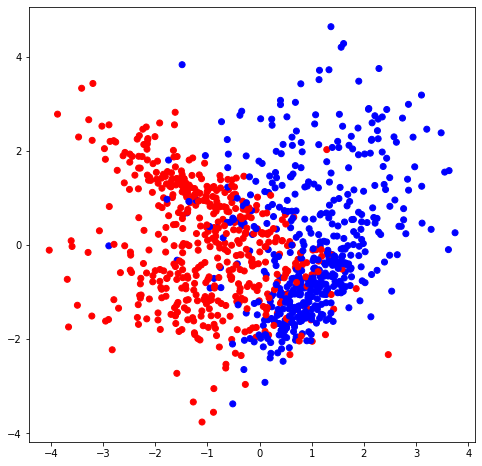

In [4]:
plt.figure(figsize=(8, 8))

plt.scatter(
    x=X[:, 0], y=X[:, 1], c=y,
    cmap=colormaps['base']
)

plt.show()

### Split dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, **split_params)

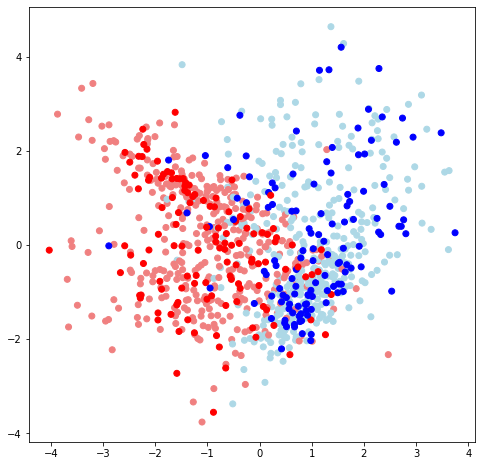

In [6]:
plt.figure(figsize=(8, 8))

plt.scatter(
    x=X_train[:, 0], y=X_train[:, 1], c=y_train,
    cmap=colormaps['light']
)
plt.scatter(
    x=X_test[:, 0], y=X_test[:, 1], c=y_test,
    cmap=colormaps['base']
)

plt.show()

### Make forests

In [7]:
forests = [
    random_forest(X_train, y_train, tree_num)
    for tree_num in tree_nums
]

### Make predictions

In [8]:
X_ = X_train, X_test
y_ = y_train, y_test

AA_ = [
    [tree_vote(forest, X) for forest in forests]
    for X in X_
]

# A_train, A_test = AA_

### Calculate metrics

In [9]:
metrics = [ 
    [error_metrics(error_matrix(a, y)) for a in A]
    for A, y in zip(AA_, y_)
]

metrics = np.array(metrics)

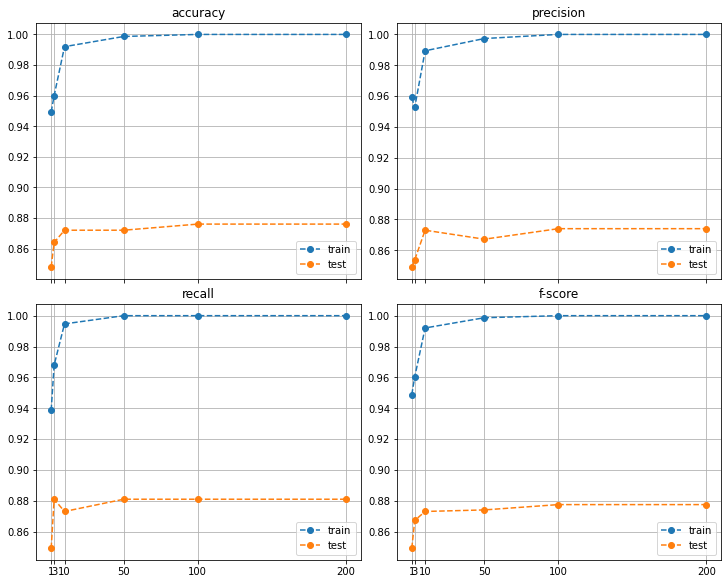

In [10]:
fig, axs = plt.subplots(
    nrows=2, ncols=2,
    sharex=True,
    figsize=(10, 8),
    constrained_layout=True
)

for metric_index, metric_label in metric_labels.items():
    ax = axs.flat[metric_index]
    ax.set(
        title = metric_label,
        xticks = tree_nums
    )
    ax.grid()

    for dataset_index, dataset_label in dataset_labels.items():
        ax.plot(
            tree_nums,
            metrics[dataset_index, :, metric_index],
            'o--',
            label=dataset_label
        )
    
    ax.legend()

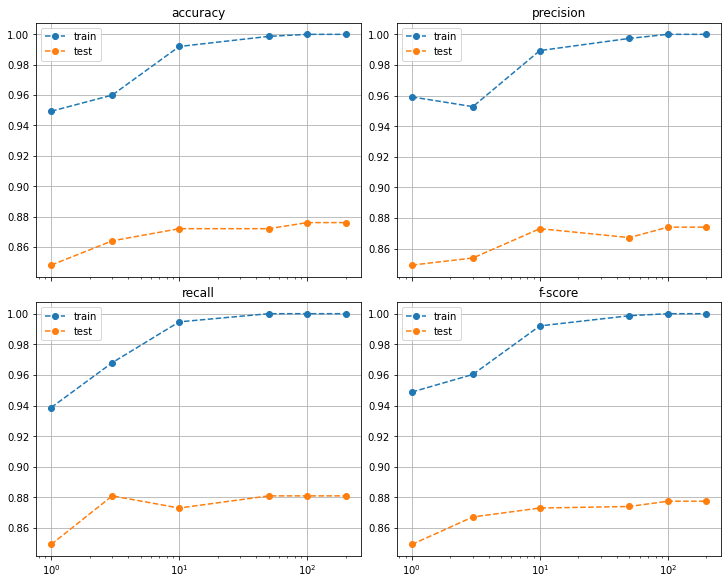

In [11]:
fig, axs = plt.subplots(
    nrows=2, ncols=2,
    sharex=True,
    figsize=(10, 8),
    constrained_layout=True
)

for metric_index, metric_label in metric_labels.items():
    ax = axs.flat[metric_index]
    ax.set(
        title = metric_label,
        xscale = 'log'
    )
    ax.grid()

    for dataset_index, dataset_label in dataset_labels.items():
        ax.plot(
            tree_nums,
            metrics[dataset_index, :, metric_index],
            'o--',
            label=dataset_label
        )
    
    ax.legend()